In [7]:
!ls
pd.set_option('display.max_columns', None)

05_Airbnb_Statics_EDA.ipynb           data_n.csv
X_air.csv                             lan_con.csv
age_gender_bkts.csv                   new_session.csv
age_gender_bkts.csv.zip               preprocess1.csv
air.py                                preprocessed_data.csv
airbnb.py                             preprocessed_data2.csv
airbnb_data.csv                       sample_submission_NDF.csv
airbnb_deeplearning.ipynb             sample_submission_NDF.csv.zip
airbnb_eda.ipynb                      sessions.csv
airbnb_home.ipynb                     sessions.csv.zip
airbnb_model.ipynb                    test_users.csv
airbnb_modeling&eda.ipynb             test_users.csv.zip
classification_project_1_airbnb_users train_users_2.csv
countries.csv                         train_users_2.csv.zip
countries.csv.zip                     y)air.csv
data3.csv


In [8]:
data = pd.read_csv('./data3.csv')
data.tail()

,user_id,date_first_booking,age,signup_flow,country_destination,gender_FEMALE,gender_MALE,gender_OTHER,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,date_account_created_1,date_account_created_2,date_account_created_3,date_account_created_4,date_account_created_5,date_account_created_6,date_account_created_7,date_account_created_8,date_account_created_9,date_account_created_10,date_account_created_11,date_account_created_12,signup_method_basic,signup_method_facebook,signup_method_google,target,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,action_acculynk_load_pin_pad,action_acculynk_pin_pad_error,action_acculynk_pin_pad_inactive,action_acculynk_pin_pad_success,action_acculynk_session_obtained,action_active,action_add_business_address_colorbox,action_add_guest_colorbox,action_add_guests,action_add_note,action_agree_terms_check,action_agree_terms_uncheck,action_airbnb_picks,action_airbrb,action_ajax_check_dates,action_ajax_get_referrals_amt,action_ajax_get_results,action_ajax_google_translate,action_ajax_google_translate_description,action_ajax_google_tran

In [9]:
data['country_destination'].unique()

array(['other', 'NDF', 'GB', 'US', 'FR', 'IT', 'CA', 'AU', 'DE', 'ES',
       'NL', 'PT'], dtype=object)

In [10]:
data['country_destination'].value_counts()

NDF      44793
US       19978
other     3630
FR        1425
IT         976
GB         728
ES         707
CA         439
DE         249
NL         247
AU         151
PT          83
Name: country_destination, dtype: int64

In [563]:
train = pd.read_csv('./train_users_2.csv')

In [565]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

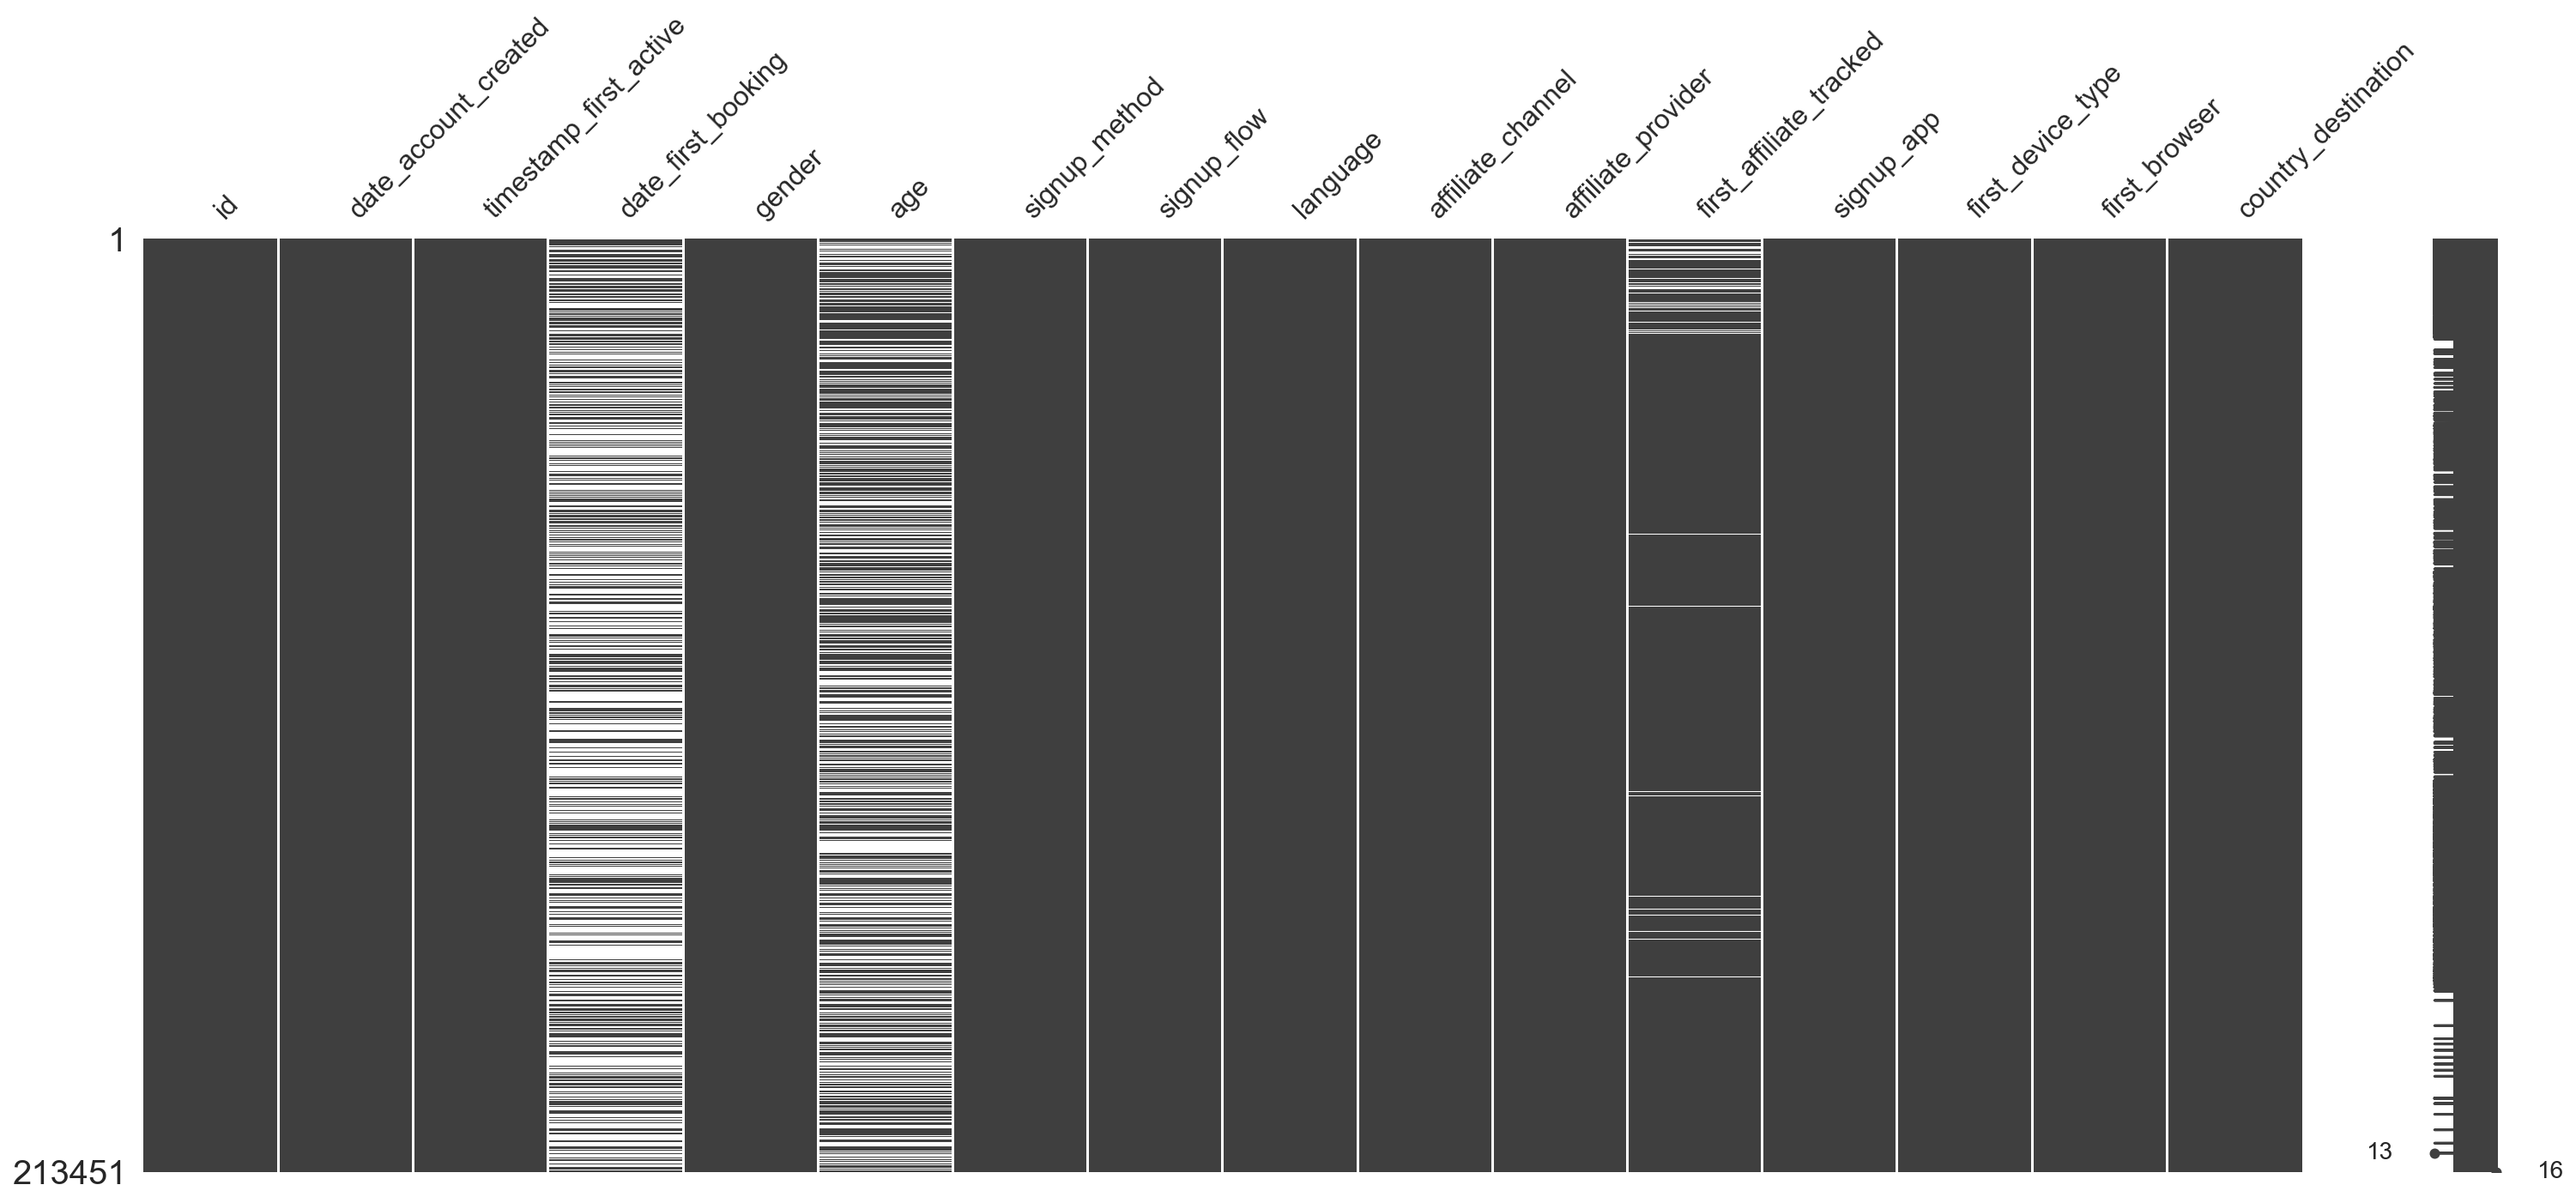

In [566]:
import missingno as msno
msno.matrix(train)

## 첫여행을 어디로 갈지 예측하기 (baseline 잡기)

In [17]:
data = pd.read_csv('./lan_con.csv')

In [12]:
data3 = pd.read_csv('./data3.csv')

In [239]:
# baseline 1
len(data3[(data3['country_destination'] == 'NDF') | (data3['country_destination'] == 'other')])/len(data3)

0.6596599732991854

In [240]:
# baseline 2
len(data3[data3['country_destination'] == 'NDF'])/len(data3)

0.610208974743209

In [241]:
# baseline 3
len(data[data['date_account_created'] == 'yes'])/len(data)

0.3054986858810687

In [242]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost

In [243]:
lab = LabelEncoder()
mm = MinMaxScaler()

In [244]:
lab.fit(data3['country_destination'])

LabelEncoder()

In [519]:
dict(zip(lab.classes_, range(0,12)))

{'AU': 0,
 'CA': 1,
 'DE': 2,
 'ES': 3,
 'FR': 4,
 'GB': 5,
 'IT': 6,
 'NDF': 7,
 'NL': 8,
 'PT': 9,
 'US': 10,
 'other': 11}

In [516]:
lab.inverse_transform([11])

array(['other'], dtype=object)

In [267]:
X = mm.fit_transform(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1))
y = data3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7046589773862502


In [249]:
# 너무 오래 걸림
X = mm.fit_transform(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1))
y = data3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

xgbc = xgboost.XGBClassifier()

xgbc.fit(X_train, y_train)

pred_y = xgbc.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

[23:42:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score: 0.7032058850240669


In [250]:
# 너무 오래 걸림
X = mm.fit_transform(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1))
y = data3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

xbgrf = xgboost.XGBRFClassifier()

xbgrf.fit(X_train, y_train)

pred_y = xbgrf.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

[23:54:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score: 0.6961674688947416


In [268]:
fea = dict(zip(data3.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1).columns, lgbm.feature_importances_))
sorted(fea.items(), key=lambda item: item[1], reverse=True)

[('age', 32398.665816014633),
 ('action_requested', 26486.38512078859),
 ('gender_OTHER', 15801.538626980036),
 ('action_verify', 11691.748396493495),
 ('action_header_userpic', 8594.107378926128),
 ('action_show', 7786.626852892339),
 ('action_confirm_email', 7578.515139283612),
 ('signup_method_facebook', 7195.061814293265),
 ('action_ajax_refresh_subtotal', 7179.058668721467),
 ('action_index', 7160.058019021526),
 ('action_personalize', 7157.961935088038),
 ('action_similar_listings', 5499.464007513598),
 ('action_ask_question', 5462.768064498901),
 ('action_update', 5069.263970416971),
 ('action_manage_listing', 5036.18031241186),
 ('action_create', 4666.907509371638),
 ('action_search_results', 4573.744991911575),
 ('action_pending', 4316.98309292458),
 ('action_open_graph_setting', 4188.201184095815),
 ('action_dashboard', 4169.572648433968),
 ('action_lookup', 3812.002021221444),
 ('action_other_hosting_reviews_first', 2874.1028481256217),
 ('action_show_personalize', 2547.1117

In [269]:
# feature importance의 평균
sum(fea.values())/len(fea.values())

600.8635419982975

In [270]:
fea_list = []

for v,i in fea.items():
    fea_list.append(i)

In [271]:
# feature들의 통계 값
pd.DataFrame([fea]).T.describe()

,0
count,502.000000
mean,600.863542
std,2324.559566
min,0.000000
25%,0.000000
50%,24.891436
75%,345.024341
max,32398.665816


In [272]:
df_fea = pd.DataFrame([fea]).T

In [273]:
# feature importance가 0인 값들의 갯수
len(df_fea[df_fea[0] == 0].index)

218

In [274]:
# 총 컬럼
len(data3.columns)

506

In [275]:
#feature importance가 0인 컬럼들
df_fea[df_fea[0] == 0].index

Index(['first_browser_AOL Explorer', 'first_browser_Apple Mail',
       'first_browser_Arora', 'first_browser_Avant Browser',
       'first_browser_BlackBerry Browser', 'first_browser_Camino',
       'first_browser_Chromium', 'first_browser_CometBird',
       'first_browser_Comodo Dragon', 'first_browser_Conkeror',
       ...
       'action_update_reservation_requirements', 'action_use_mobile_site',
       'action_view', 'action_views', 'action_views_campaign',
       'action_views_campaign_rules', 'action_weibo_signup_referral_finish',
       'action_widget', 'action_wishlists', 'action_zendesk_login_jwt'],
      dtype='object', length=218)

In [276]:
# feature importance가 0이 아닌 컬럼들
len(data3.drop(df_fea[df_fea[0] == 0].index,1).columns)

288

In [277]:
data4 = data3.drop(df_fea[df_fea[0] == 0].index,1)

In [290]:
# 218개의 안중요한 컬럼들을 덜어내도 정확도는 똑같다
X = data4.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1)
y = data4['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7046589773862502


In [291]:
# 첫여행지 예측
fea = dict(zip(data4.drop(['user_id', 'country_destination', 'target', 'date_first_booking',], 1).columns, lgbm.feature_importances_))
sorted(fea.items(), key=lambda item: item[1], reverse=True)

[('age', 32398.665816014633),
 ('action_requested', 26486.38512078859),
 ('gender_OTHER', 15801.538626980036),
 ('action_verify', 11691.748396493495),
 ('action_header_userpic', 8594.107378926128),
 ('action_show', 7786.626852892339),
 ('action_confirm_email', 7578.515139283612),
 ('signup_method_facebook', 7195.061814293265),
 ('action_ajax_refresh_subtotal', 7179.058668721467),
 ('action_index', 7160.058019021526),
 ('action_personalize', 7157.961935088038),
 ('action_similar_listings', 5499.464007513598),
 ('action_ask_question', 5462.768064498901),
 ('action_update', 5069.263970416971),
 ('action_manage_listing', 5036.18031241186),
 ('action_create', 4666.907509371638),
 ('action_search_results', 4573.744991911575),
 ('action_pending', 4316.98309292458),
 ('action_open_graph_setting', 4188.201184095815),
 ('action_dashboard', 4169.572648433968),
 ('action_lookup', 3812.002021221444),
 ('action_other_hosting_reviews_first', 2874.1028481256217),
 ('action_show_personalize', 2547.1117

In [281]:
df_fea = pd.DataFrame([fea]).T

In [301]:
import shap

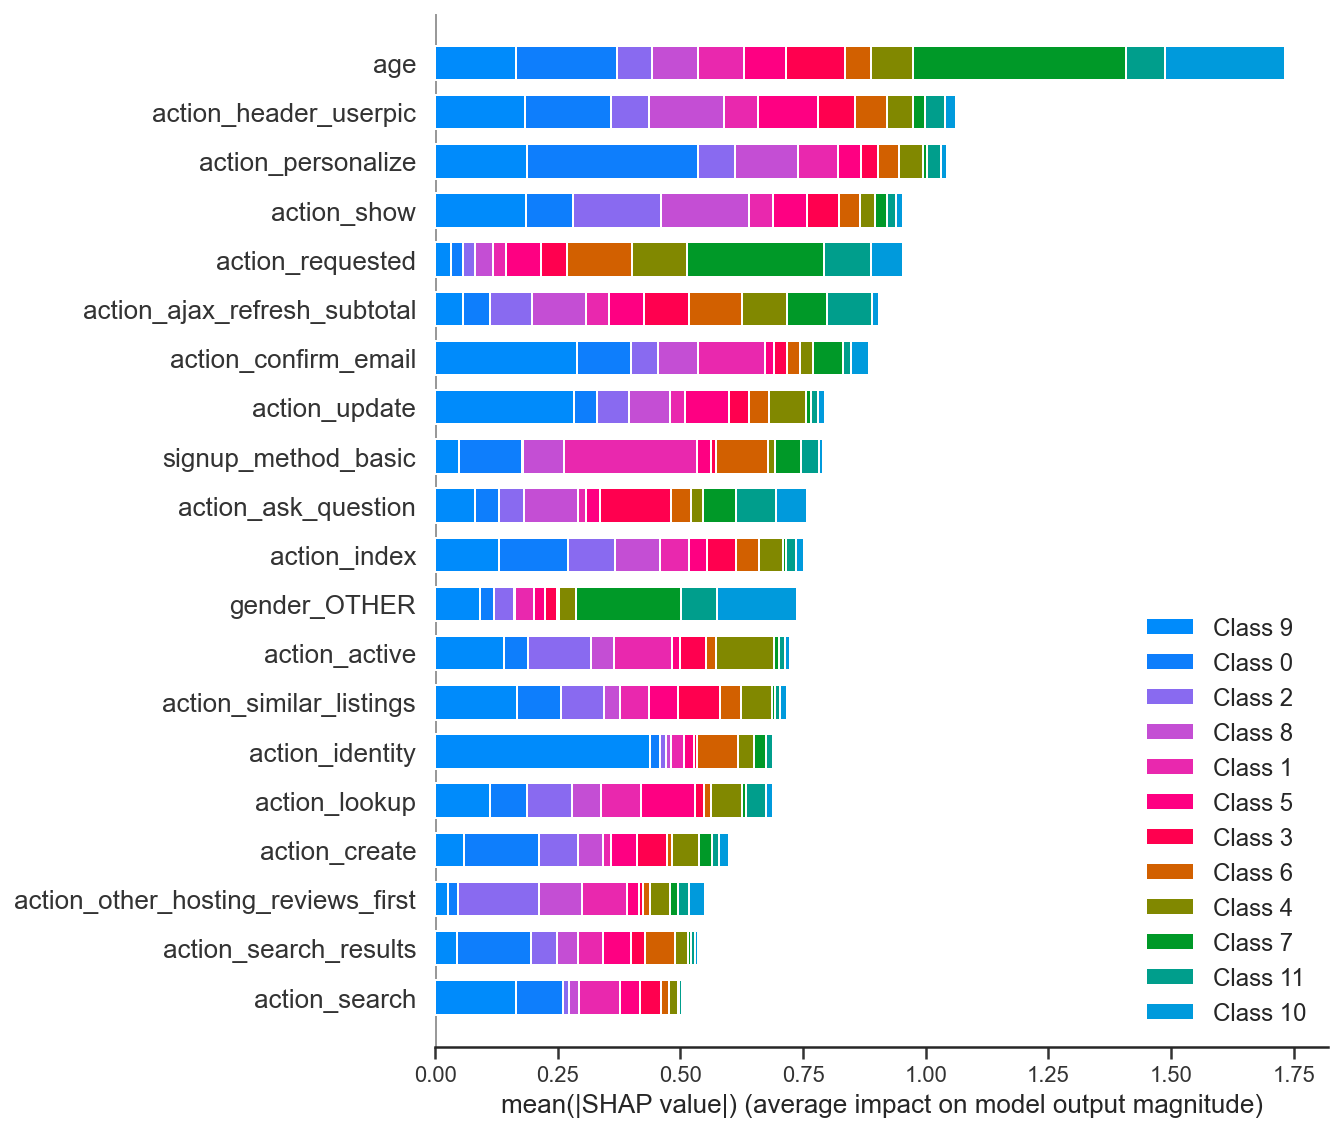

In [303]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

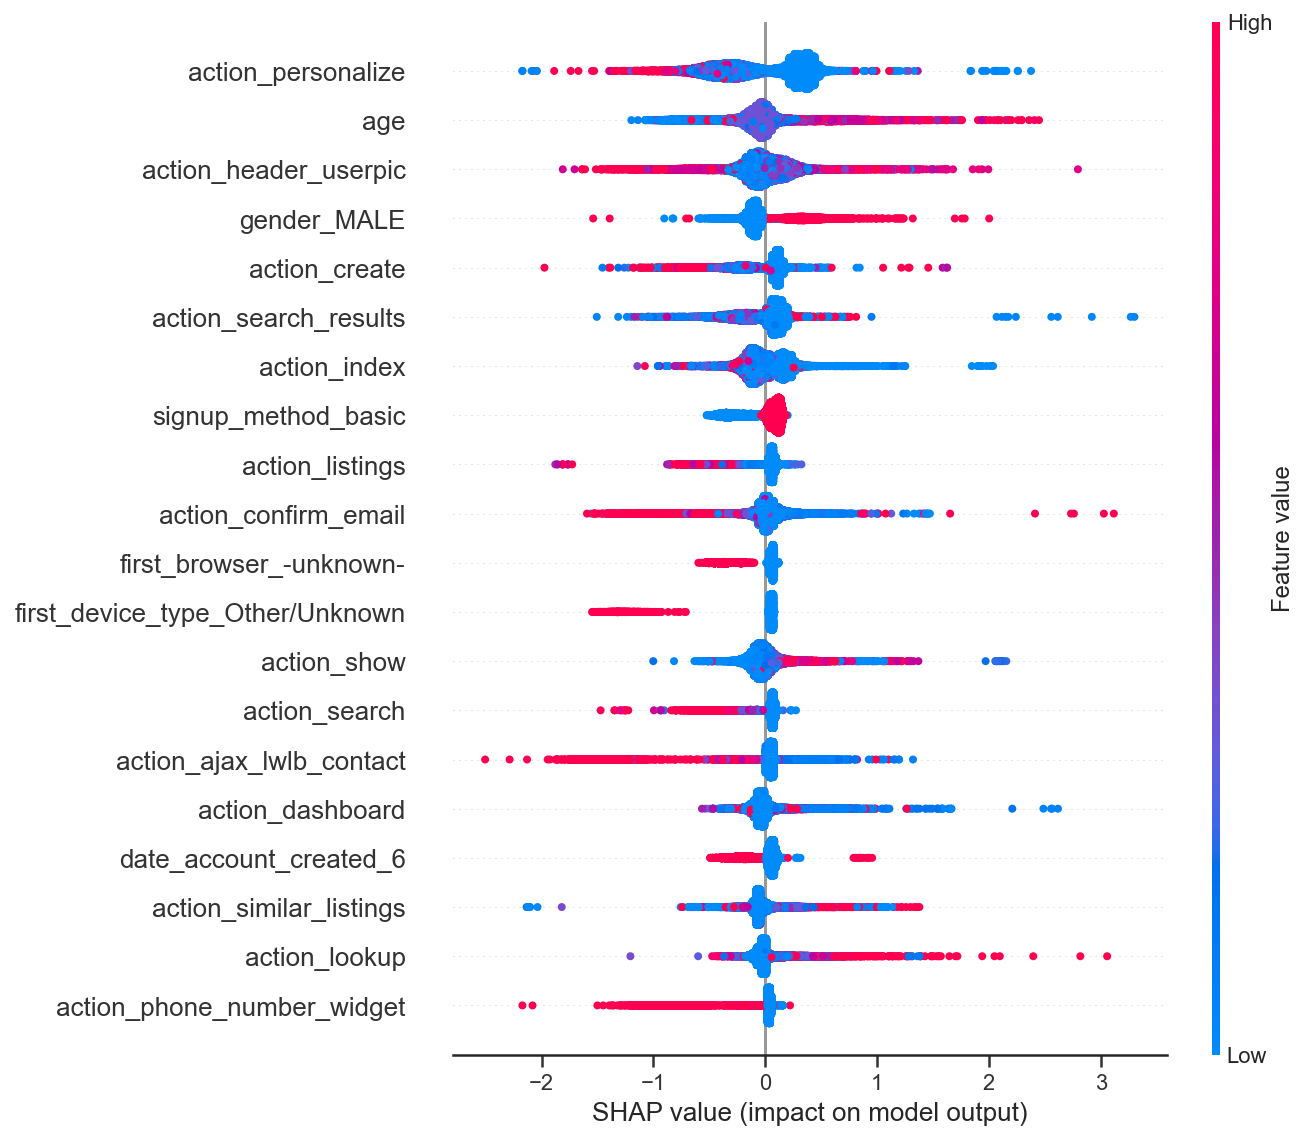

In [304]:
shap.summary_plot(shap_values[0], X_test)

In [508]:
data4[['action_personalize', 'target']]

,action_personalize,target
36702,0.0,10
40682,0.0,7
40684,0.0,7
40686,0.0,10
40687,0.0,7
...,...,...
35590,3760562.0,7
68724,3788323.0,7
3291,3847512.0,7
53941,4170885.0,7


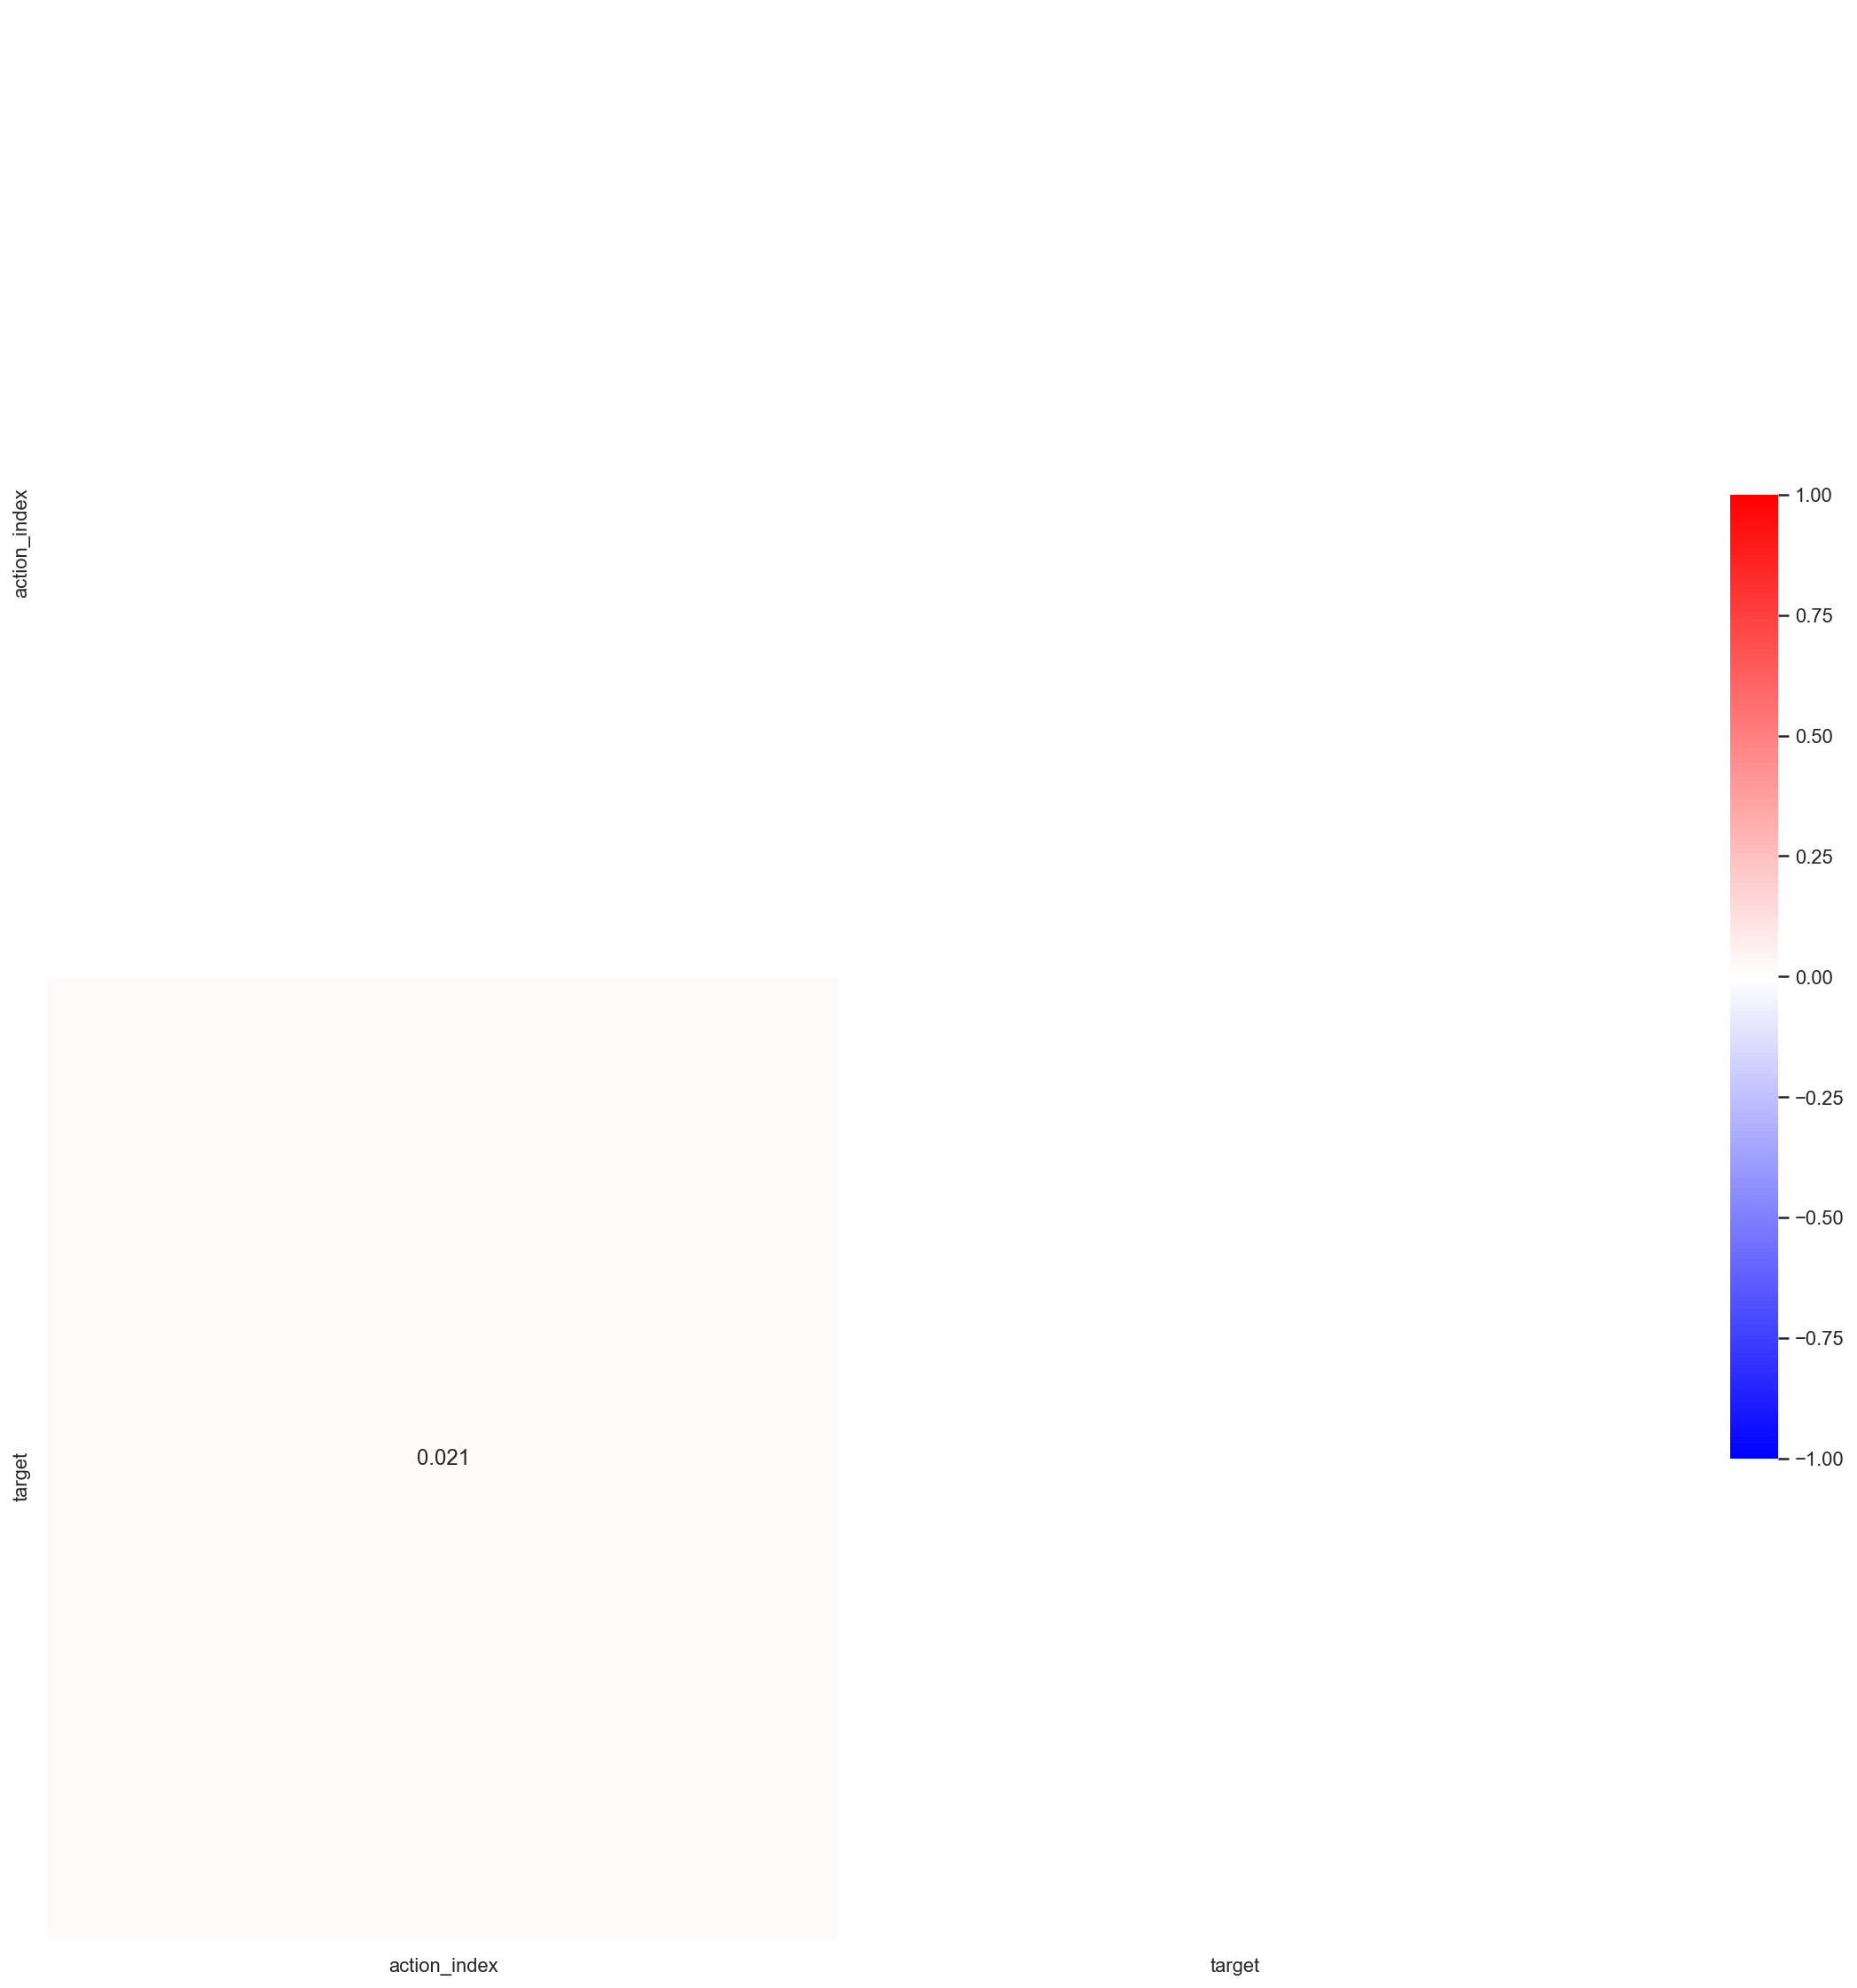

In [511]:
# 빨간색은 양의상관관계 파란색은 음의상관관계
df = data4[['action_index', 'target']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [520]:
# age null값 제거

In [524]:
sess = pd.read_csv('./new_session.csv')

In [525]:
prep2 = pd.read_csv('./preprocessed_data2.csv')

In [526]:
tour3 = prep2.merge(sess, left_on='id', right_on='user_id')

In [528]:
tour3[['date_first_booking']] = tour3[['date_first_booking']].fillna('no')
tour3['date_first_booking'][tour3['date_first_booking'] != 'no'] = 'yes'

In [530]:
tour3 = tour3.dropna()

In [532]:
tour3.reset_index(drop=True, inplace=True)

In [534]:
lab.fit(tour3['country_destination'])

LabelEncoder()

In [535]:
tour3['target'] = lab.transform(tour3['country_destination'])

In [537]:
# 나이 결측치 제거
X = tour3.drop(['user_id', 'id', 'country_destination', 'target', 'date_first_booking',], 1)
y = tour3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.5981791338582677


In [538]:
fea = dict(zip(tour3.drop(['user_id', 'id', 'country_destination', 'target', 'date_first_booking',], 1).columns, lgbm.feature_importances_))
sorted(fea.items(), key=lambda item: item[1], reverse=True)

[('signup_method_facebook', 11440.822274036705),
 ('action_requested', 10044.827768920455),
 ('age', 8104.913882584078),
 ('timestamp_first_active', 7756.656080858549),
 ('action_header_userpic', 7091.427856304217),
 ('action_show', 6109.838178521022),
 ('action_index', 5911.2167983632535),
 ('action_confirm_email', 5740.36711835186),
 ('action_personalize', 4652.5824722705875),
 ('action_manage_listing', 4497.062448523939),
 ('action_ajax_refresh_subtotal', 4386.888591460884),
 ('action_dashboard', 4109.447368298192),
 ('action_update', 3994.936926915776),
 ('action_verify', 3982.1406717710197),
 ('action_create', 3966.0610776273534),
 ('action_similar_listings', 3637.1714379964396),
 ('action_ask_question', 3407.802075907588),
 ('action_search_results', 3261.7150334562175),
 ('action_lookup', 2535.5311052771285),
 ('action_pending', 2343.6942313066684),
 ('action_show_personalize', 2154.0157249020413),
 ('action_other_hosting_reviews_first', 2035.696694769431),
 ('action_edit', 2021.

In [539]:
# 정확도가 baseline을 못넘어서 drop

## 여행갈사람 분류하기

In [305]:
# 모델의 정확도를 위해서
# age null값에 median 34 대입

In [406]:
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as pyo
cf.go_offline(connected=True)

In [307]:
mm = MinMaxScaler()

In [308]:
sess = pd.read_csv('./new_session.csv')

In [309]:
prep = pd.read_csv('./preprocessed_data.csv')

In [310]:
tour = prep.merge(sess, left_on='id', right_on='user_id')

In [311]:
tour[['date_first_booking']] = tour[['date_first_booking']].fillna('no')

In [312]:
# 첫 부킹이 없는 유저
print('no booking : ', len(tour[tour['date_first_booking'] == 'no']))
print('no booking : ', len(tour[tour['date_first_booking'] == 'no'])/len(tour))

no booking :  44469
no booking :  0.612006440869242


In [313]:
# 첫 부킹이 있는 유저
print('booked : ', len(tour[tour['date_first_booking'] != 'no']))
print('booked : ', len(tour[tour['date_first_booking'] != 'no'])/len(tour))

booked :  28192
booked :  0.3879935591307579


In [314]:
tour['date_first_booking'][tour['date_first_booking'] != 'no'] = 'yes'

In [315]:
label_booking = LabelEncoder()

In [316]:
label_booking.fit(tour['date_first_booking'])

LabelEncoder()

In [317]:
tour['booking'] = label_booking.transform(tour['date_first_booking'])

In [318]:
X = mm.fit_transform(tour.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.776962245974586


In [319]:
fea3 = dict(zip(tour.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea3.items(), key=lambda item: item[1], reverse=True)

[('action_requested', 29150.649710416794),
 ('age', 26183.426144123077),
 ('gender_OTHER', 15600.585595607758),
 ('signup_method_facebook', 7817.576439857483),
 ('action_manage_listing', 4241.935425043106),
 ('action_ask_question', 3211.802285194397),
 ('action_confirm_email', 2095.824601650238),
 ('action_pending', 1979.3941917419434),
 ('action_ajax_refresh_subtotal', 1560.3014521598816),
 ('action_at_checkpoint', 1453.5931057929993),
 ('action_complete_status', 1057.1084926128387),
 ('action_create', 1043.5086798667908),
 ('affiliate_channel_content', 1002.3174862861633),
 ('signup_method_basic', 892.2421426773071),
 ('action_cancellation_policies', 890.1275539398193),
 ('action_header_userpic', 826.8513522148132),
 ('action_update', 752.3659791946411),
 ('action_index', 672.2508082389832),
 ('action_show', 660.2921681404114),
 ('action_personalize', 610.7714877128601),
 ('action_this_hosting_reviews', 604.1035308837891),
 ('action_identity', 496.24969005584717),
 ('action_set_user'

In [320]:
fea2_df = pd.DataFrame([fea2]).T

In [321]:
fea2_df[fea2_df[0] == 0].index

Index(['signup_app_Web', 'affiliate_channel_api',
       'affiliate_channel_remarketing', 'affiliate_channel_seo',
       'signup_method_google', 'affiliate_provider_baidu',
       'affiliate_provider_bing', 'affiliate_provider_craigslist',
       'affiliate_provider_daum', 'affiliate_provider_direct',
       ...
       'action_use_mobile_site', 'action_view', 'action_views',
       'action_views_campaign', 'action_views_campaign_rules',
       'action_weibo_signup_referral_finish', 'action_why_host',
       'action_widget', 'action_wishlists', 'action_zendesk_login_jwt'],
      dtype='object', length=253)

In [322]:
tour2 = tour.drop(fea2_df[fea2_df[0] == 0].index,1)

In [333]:
X = mm.fit_transform(tour2.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour2['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7772374879581632


In [334]:
fea3 = dict(zip(tour2.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea3.items(), key=lambda item: item[1], reverse=True)

[('action_requested', 29170.435898065567),
 ('age', 26143.786039590836),
 ('gender_OTHER', 15703.865138053894),
 ('signup_method_facebook', 7809.02513551712),
 ('action_manage_listing', 4229.054563045502),
 ('action_ask_question', 3209.719432115555),
 ('action_pending', 2024.7932422161102),
 ('action_confirm_email', 2012.7875881195068),
 ('action_ajax_refresh_subtotal', 1655.2026615142822),
 ('action_at_checkpoint', 1420.0690641403198),
 ('action_create', 1320.6277313232422),
 ('action_complete_status', 1029.8199729919434),
 ('affiliate_channel_content', 996.7382159233093),
 ('signup_method_basic', 904.683652639389),
 ('action_cancellation_policies', 884.7845118045807),
 ('action_header_userpic', 801.8427510261536),
 ('action_index', 739.0151965618134),
 ('action_update', 697.8251957893372),
 ('action_show', 629.2561120986938),
 ('action_personalize', 623.3257212638855),
 ('action_this_hosting_reviews', 623.0454134941101),
 ('action_dashboard', 549.6531181335449),
 ('action_set_user', 

In [340]:
fea3_df = pd.DataFrame([fea3]).T

In [341]:
fea3_df = fea3_df.sort_values(by=0, ascending=False)[:30]

In [342]:
layout = go.Layout(title=dict(text='중요도 분포', font=dict(size=20), x=0.5, y=0.95), width=500, height=1000, yaxis=dict(tickvals=tuple(fea2_df.index)), xaxis=dict(tickformat=",d"))
fea3_df.sort_values(by=0).iplot(kind='barh', layout=layout)

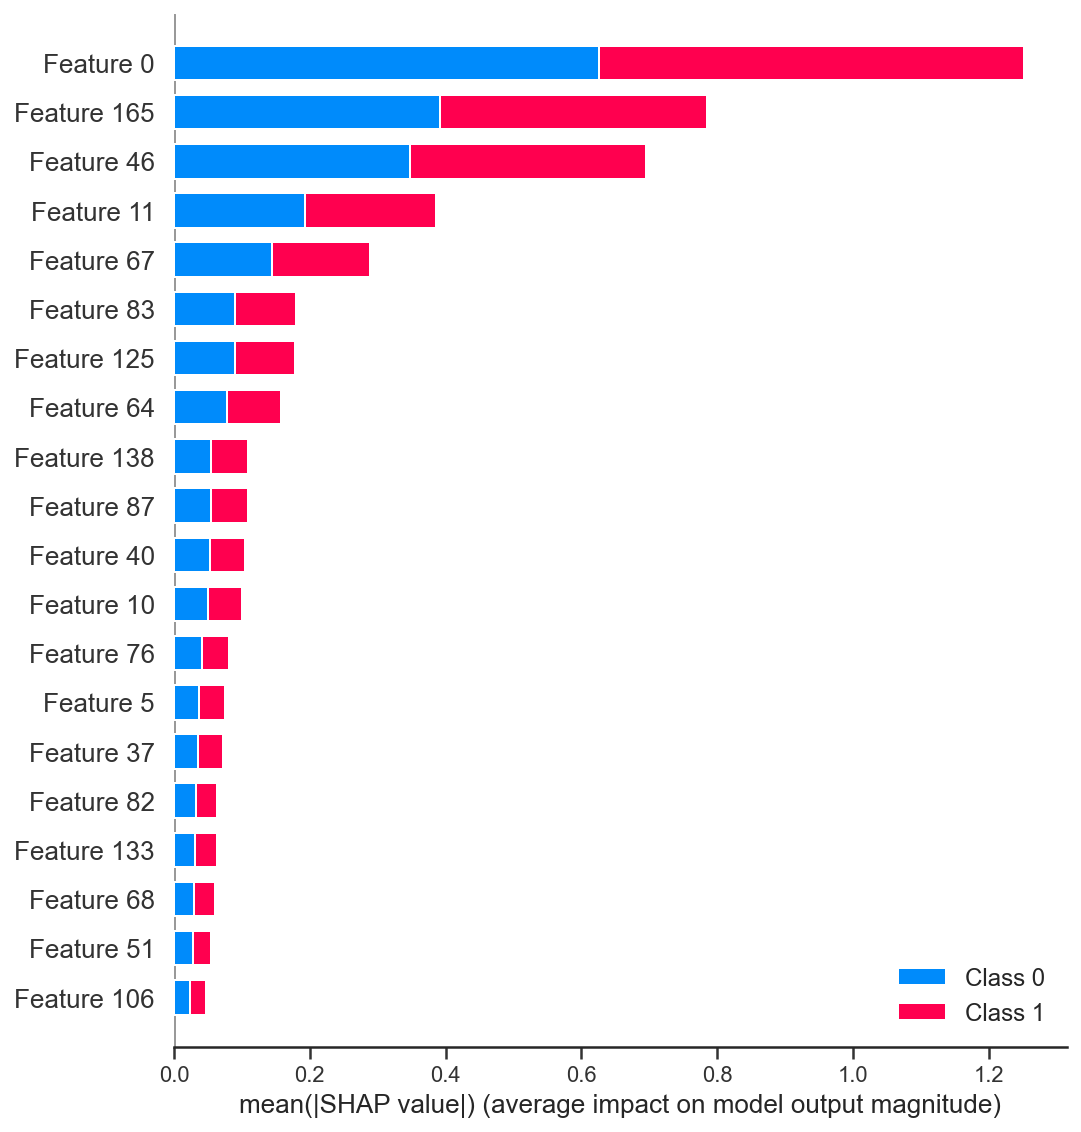

In [343]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

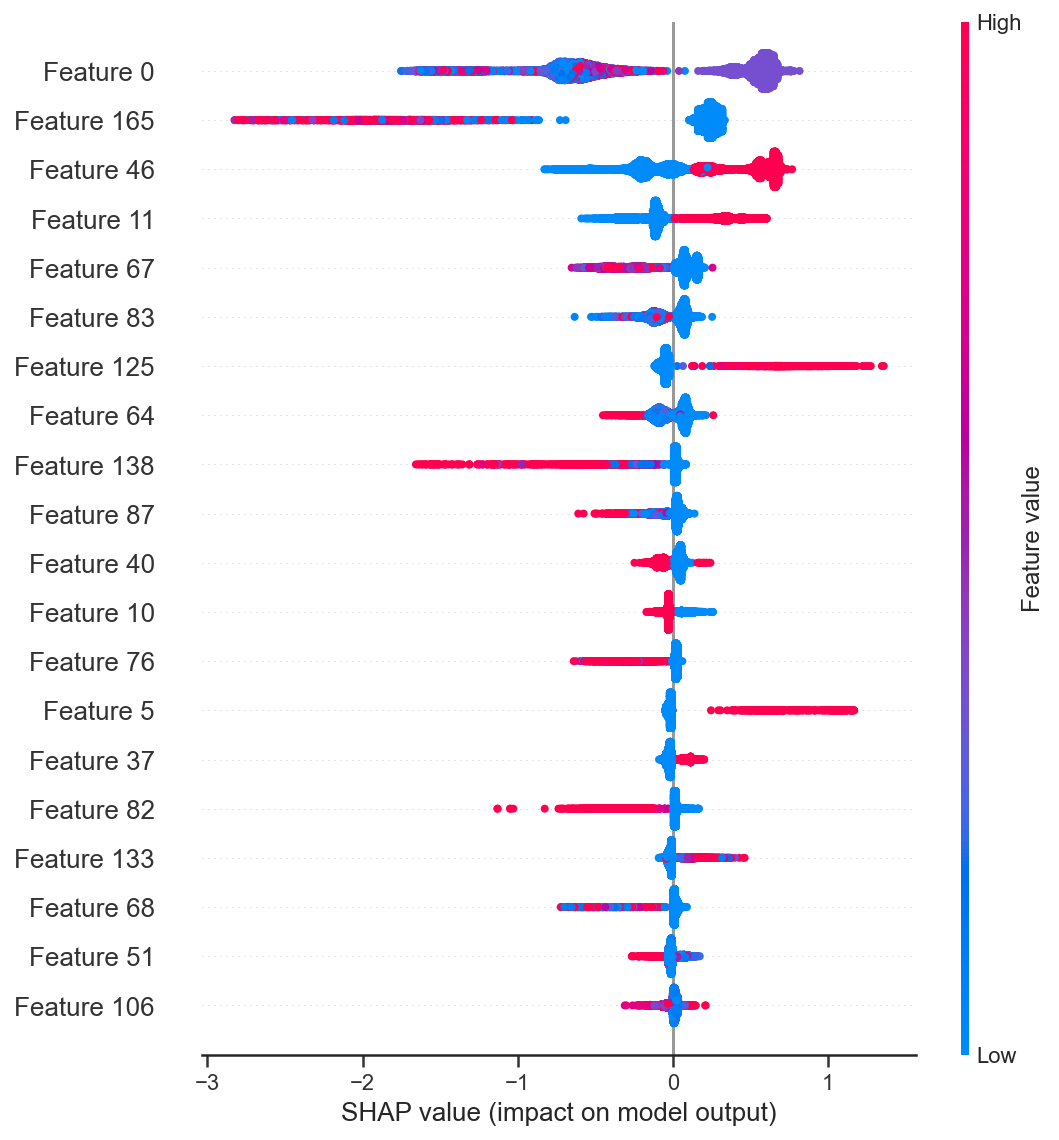

In [344]:
shap.summary_plot(shap_values[0], X_test)

In [ ]:
# 모델로 데이터를 분석 할 때는
# 최대한 데이터를 유지
# age null값을 drop

In [541]:
sess = pd.read_csv('./new_session.csv')

In [542]:
prep2 = pd.read_csv('./preprocessed_data2.csv')

In [543]:
tour3 = prep2.merge(sess, left_on='id', right_on='user_id')

In [544]:
tour3[['date_first_booking']] = tour3[['date_first_booking']].fillna('no')

In [545]:
tour3['date_first_booking'][tour3['date_first_booking'] != 'no'] = 'yes'

In [546]:
len(tour3)

72661

In [547]:
tour3 = tour3.dropna()

In [548]:
tour3.reset_index(drop=True, inplace=True)

In [549]:
label_booking = LabelEncoder()

In [550]:
label_booking.fit(tour3['date_first_booking'])

LabelEncoder()

In [551]:
tour3['booking'] = label_booking.transform(tour3['date_first_booking'])

In [361]:
X = mm.fit_transform(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour3['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

print("accuracy_score: {}".format(accuracy_score(y_test, pred_y)))

accuracy_score: 0.7120242782152231


In [362]:
fea6 = dict(zip(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea6.items(), key=lambda item: item[1], reverse=True)

[('signup_method_facebook', 11709.165845155716),
 ('action_requested', 9974.309267044067),
 ('action_manage_listing', 3937.462752342224),
 ('action_confirm_email', 1545.657808303833),
 ('action_ask_question', 1491.9579558372498),
 ('age', 1222.535282611847),
 ('action_pending', 1022.5044379234314),
 ('affiliate_channel_content', 995.6020307540894),
 ('action_ajax_refresh_subtotal', 937.5275390148163),
 ('action_at_checkpoint', 927.9497365951538),
 ('action_create', 888.6340560913086),
 ('action_complete_status', 777.2179493904114),
 ('action_index', 761.4905669689178),
 ('action_set_user', 741.7572064399719),
 ('action_show', 723.766072511673),
 ('action_edit', 666.7761270999908),
 ('action_header_userpic', 618.351068019867),
 ('action_update', 613.3425092697144),
 ('action_identity', 571.0375666618347),
 ('action_similar_listings', 552.610048532486),
 ('action_verify', 504.5649552345276),
 ('action_kba_update', 492.17212080955505),
 ('action_recommend', 482.06571912765503),
 ('action_

In [363]:
booking_y = tour3[tour3['date_first_booking'] == 'yes']
booking_n = tour3[tour3['date_first_booking'] == 'no']

In [364]:
len(booking_y), len(booking_n)

(22153, 18486)

In [365]:
# baseline
len(booking_y)/len(tour3)

0.5451167597627894

In [231]:
X = mm.fit_transform(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1))
y = tour3['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

fea2 = dict(zip(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea2.items(), key=lambda item: item[1], reverse=True)[:10]

[('signup_method_facebook', 11709.165845155716),
 ('action_requested', 9974.309267044067),
 ('action_manage_listing', 3937.462752342224),
 ('action_confirm_email', 1545.657808303833),
 ('action_ask_question', 1491.9579558372498),
 ('age', 1222.535282611847),
 ('action_pending', 1022.5044379234314),
 ('affiliate_channel_content', 995.6020307540894),
 ('action_ajax_refresh_subtotal', 937.5275390148163),
 ('action_at_checkpoint', 927.9497365951538)]

In [552]:
X = tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1)
y = tour3['booking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

lgbm = LGBMClassifier(importance_type='gain')

lgbm.fit(X_train, y_train)

pred_y = lgbm.predict(X_test)

fea2 = dict(zip(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns, lgbm.feature_importances_))
sorted(fea2.items(), key=lambda item: item[1], reverse=True)[:10]

[('signup_method_facebook', 11709.165845155716),
 ('action_requested', 9974.309267044067),
 ('action_manage_listing', 3937.462752342224),
 ('action_confirm_email', 1545.657808303833),
 ('action_ask_question', 1491.9579558372498),
 ('age', 1222.535282611847),
 ('action_pending', 1022.5044379234314),
 ('affiliate_channel_content', 995.6020307540894),
 ('action_ajax_refresh_subtotal', 937.5275390148163),
 ('action_at_checkpoint', 927.9497365951538)]

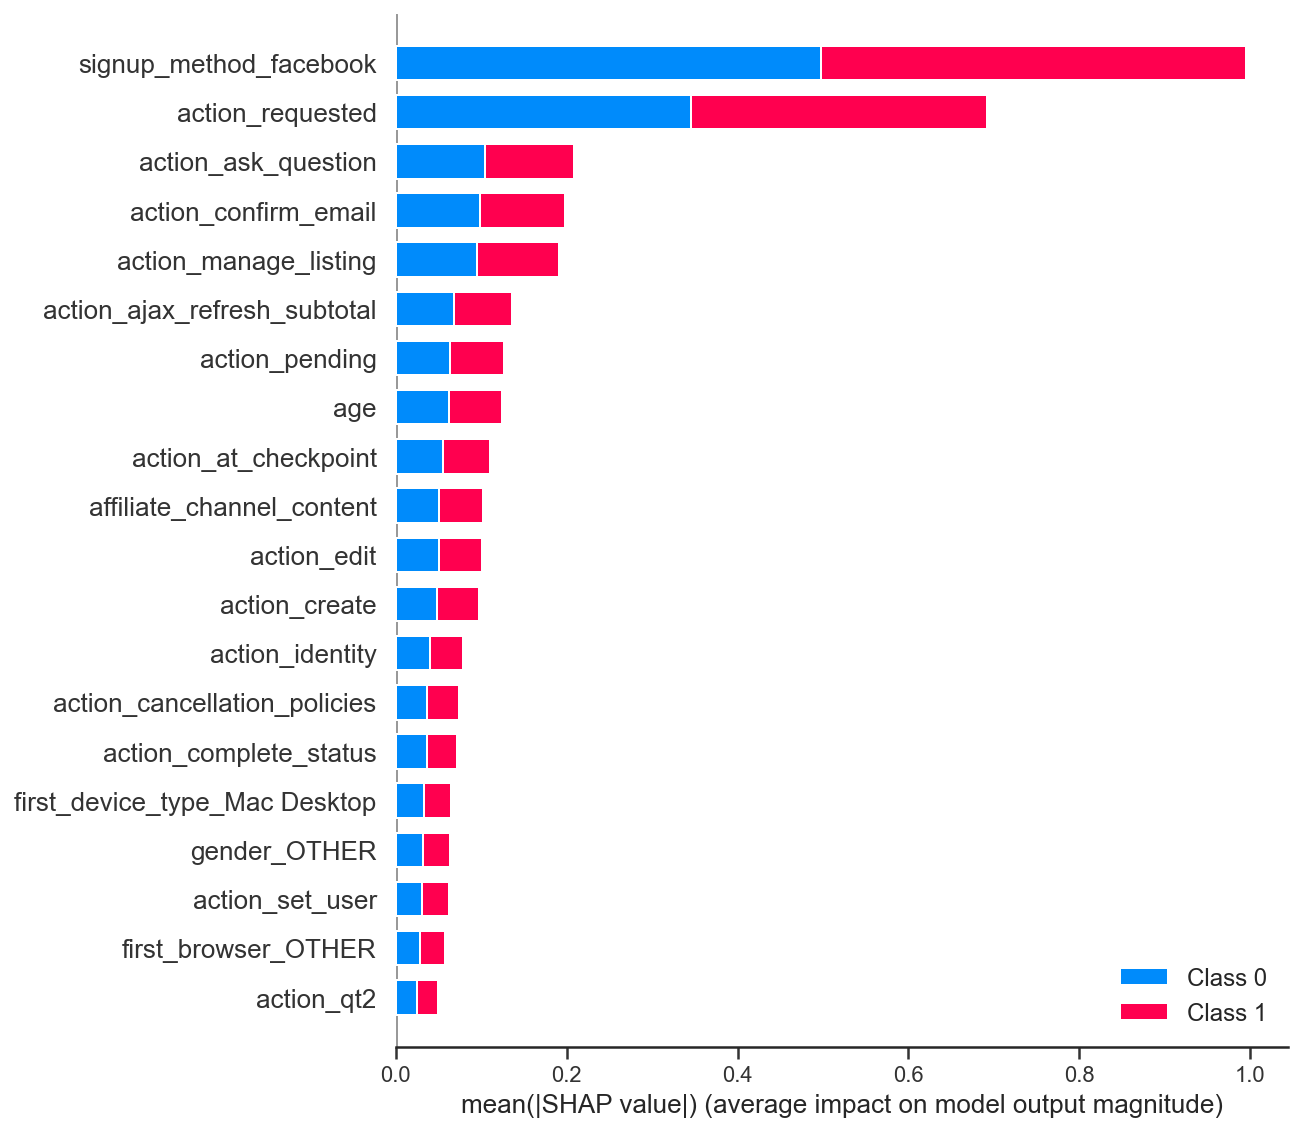

In [553]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

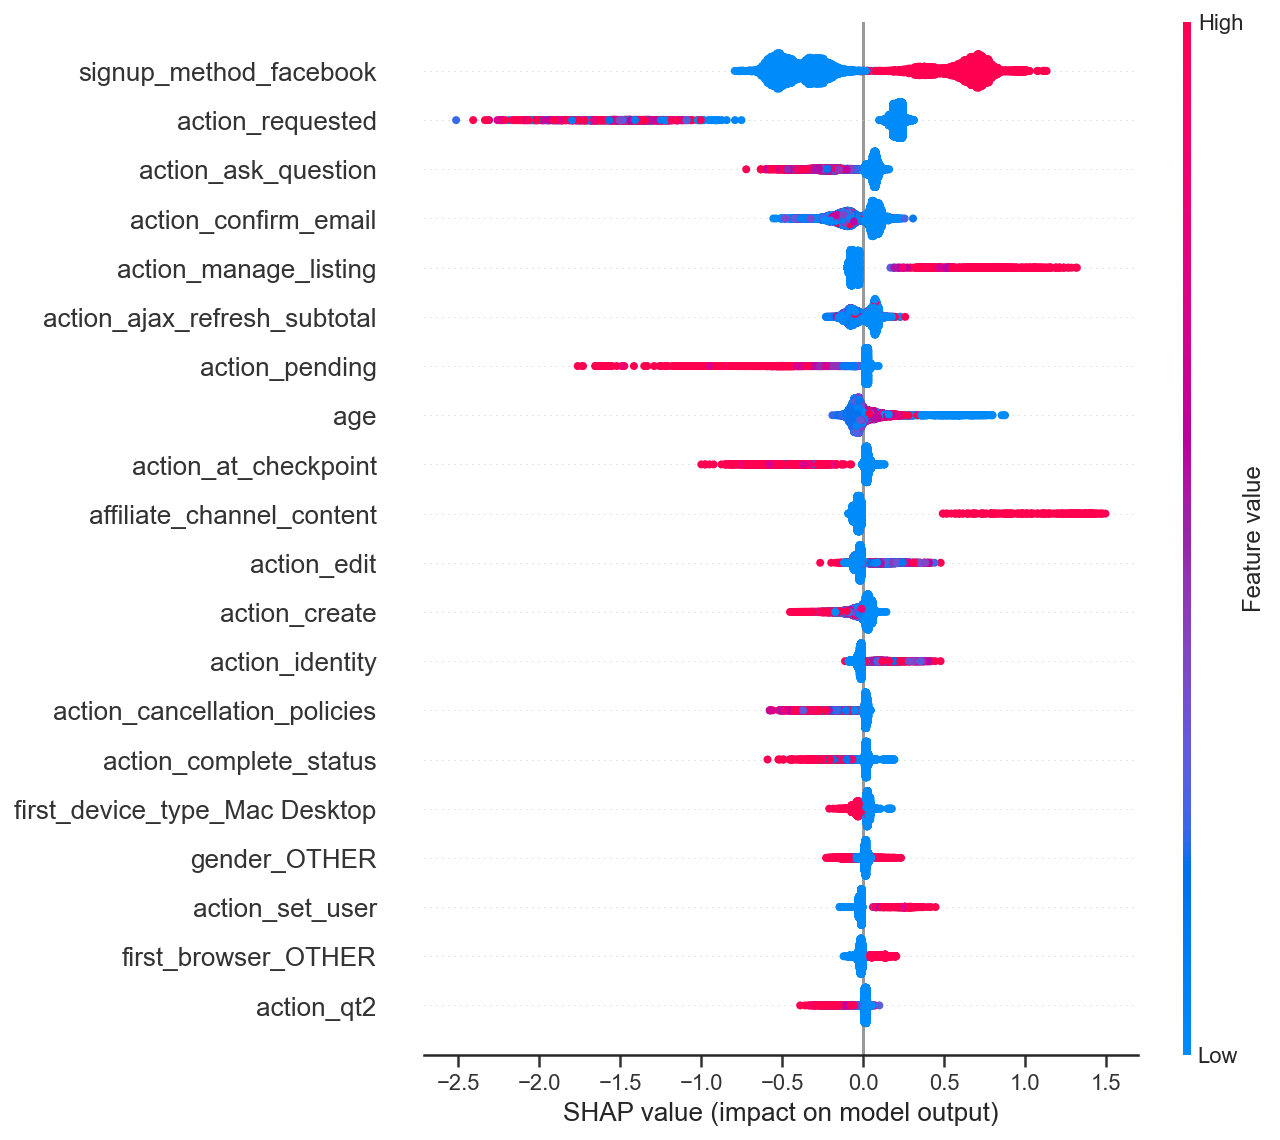

In [554]:
shap.summary_plot(shap_values[0], X_test)

In [378]:
for i in [15, 364, 150, 182, 272, 137, 309, 0, 151, 7, 210, 190, 248, 165, 180, 88, 96, 382, 83, 340] :
    print(tour3.drop(['id', 'user_id', 'timestamp_first_active', 'country_destination', 'date_first_booking', 'date_first_booking','booking'], 1).columns[i])

signup_method_facebook
action_requested
action_ask_question
action_confirm_email
action_manage_listing
action_ajax_refresh_subtotal
action_pending
age
action_at_checkpoint
affiliate_channel_content
action_edit
action_create
action_identity
action_cancellation_policies
action_complete_status
first_device_type_Mac Desktop
gender_OTHER
action_set_user
first_browser_OTHER
action_qt2


# 주요 변수들로 히트맵, 상관관계 확인

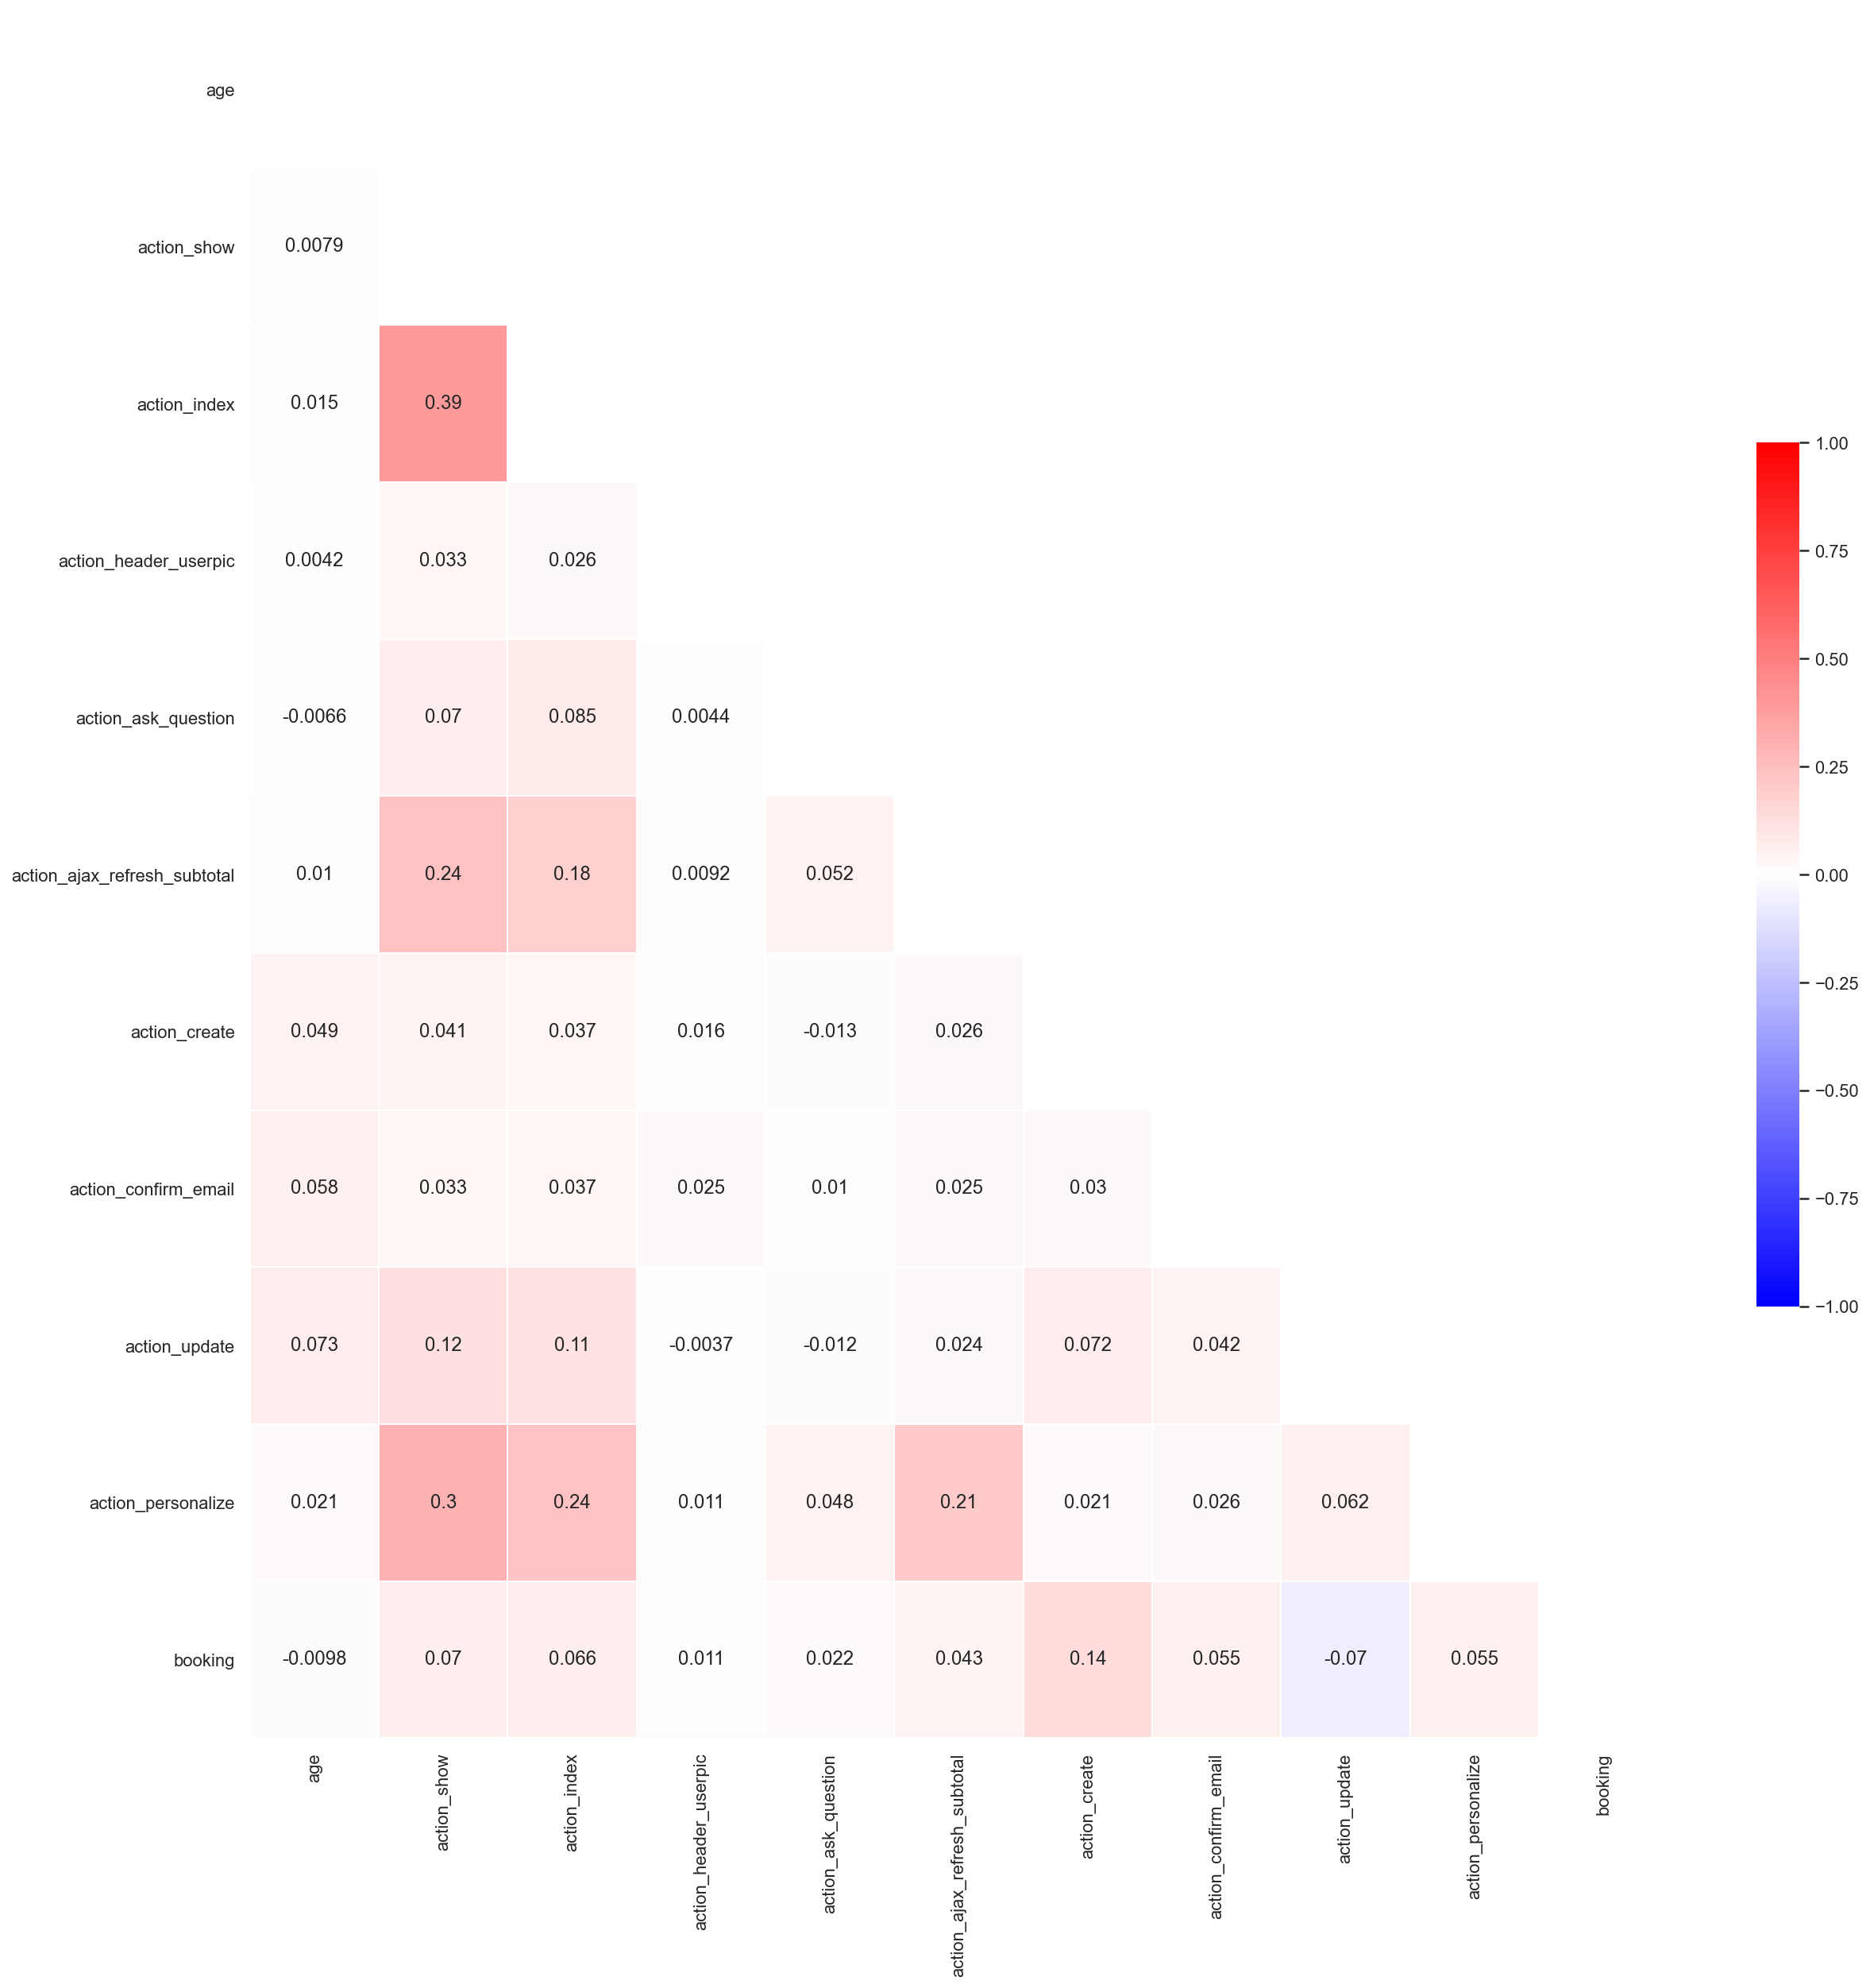

In [368]:
# 빨간색은 양의상관관계 파란색은 음의상관관계
df = tour3[['age', 'action_show', 'action_index', 'action_header_userpic', 'action_ask_question', 'action_ajax_refresh_subtotal', 'action_create', 'action_confirm_email', 'action_update', 'action_personalize', 'booking']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

# shap 분석하기 - (여행 갈 사람 찾기)

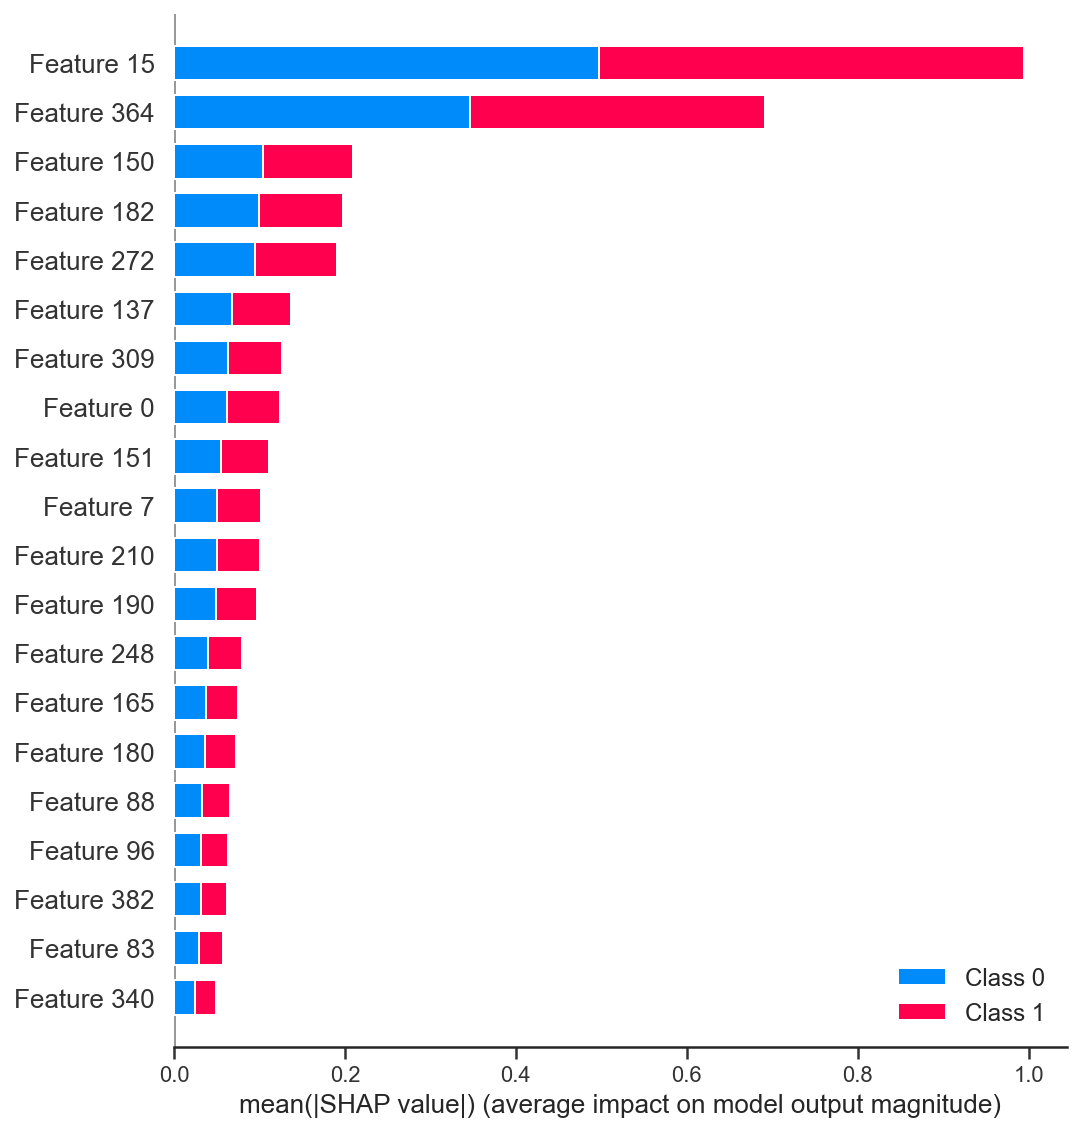

In [380]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

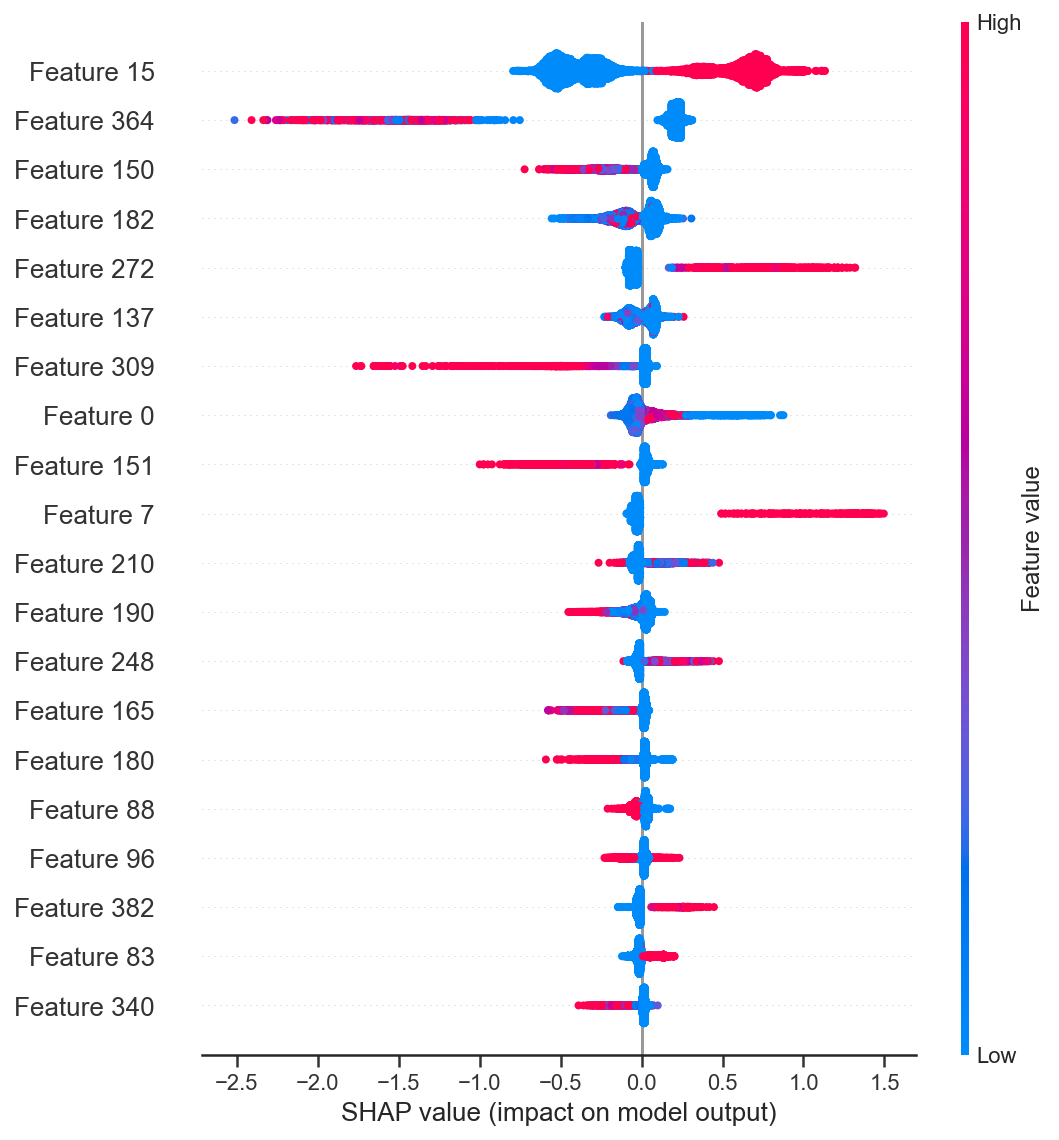

In [381]:
shap.summary_plot(shap_values[0], X_test)

- signup_method_facebook
- action_requested
- action_ask_question
- action_confirm_email
- action_manage_listing
- action_ajax_refresh_subtotal
- action_pending
- age
- action_at_checkpoint
- affiliate_channel_content
- action_edit
- action_create
- action_identity
- action_cancellation_policies
- action_complete_status
- first_device_type_Mac Desktop
- gender_OTHER
- action_set_user
- first_browser_OTHER
- action_qt2

In [496]:
print('Signup_method_facebook : ', booking_y[['signup_method_facebook']].sum())
print('Signup_method_others : ', len(booking_y) - booking_y[['signup_method_facebook']].sum())

Signup_method_facebook :  signup_method_facebook    6647
dtype: int64
Signup_method_others :  signup_method_facebook    15506
dtype: int64


In [497]:
print('Signup_method_facebook : ', booking_n[['signup_method_facebook']].sum())
print('Signup_method_others : ', len(booking_n) - booking_n[['signup_method_facebook']].sum())

Signup_method_facebook :  signup_method_facebook    10664
dtype: int64
Signup_method_others :  signup_method_facebook    7822
dtype: int64


In [557]:
axis = ['Signup_method_facebook', 'Signup_method_others']

layout = go.Layout(title=dict(text='페이스북 가입 분포', font=dict(size=25), x=0.5, y=0.87), yaxis=dict(tickformat=",d"))
fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=axis,
    y=[6647, 15506],
    name='Booked',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=axis,
    y=[10664, 7822],
    name='not_Booked',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

In [559]:
booking_y[['action_requested']].mean()

action_requested    11481.67571
dtype: float64

In [560]:
booking_n[['action_requested']].mean()

action_requested    1259.850806
dtype: float64

In [562]:
axis = ['action_requested']

layout = go.Layout(title=dict(text='action_requested 평균', font=dict(size=25), x=0.5, y=0.87), yaxis=dict(tickformat=",d"))
fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=axis,
    y=[11481.67571],
    name='Booked',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=axis,
    y=[1259.850806],
    name='not_Booked',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

# feature importance(top 10)로 설명해보기

### 'age', 187

In [62]:
booking_y[['age']].sum()

age    777686.0
dtype: float64

In [67]:
layout = go.Layout(title=dict(text='여행 간 사람들의 나이분포', font=dict(size=30), x=0.5, y=0.9))
booking_y['age'].value_counts().iplot(kind='bar', layout=layout)

In [68]:
booking_n[['age']].sum()

age    653187.0
dtype: float64

In [69]:
layout = go.Layout(title=dict(text='여행 안간 사람들의 나이분포', font=dict(size=30), x=0.5, y=0.9))
booking_n['age'].value_counts().iplot(kind='bar', layout=layout)

### 'action_show', 95

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_show']].describe()

In [ ]:
# 부킹을 안하는 사람들에게 이 행동을 자주 하도록 마케팅 해야한다
booking_n[['action_show']].describe()

In [ ]:
booking_y[['action_show']].describe() - booking_n[['action_show']].describe()

In [ ]:
booking_y[['action_show']].describe().T

In [ ]:
list(booking_y[['action_show']].describe().T.columns)

In [ ]:
list(booking_y[['action_show']].describe().T.values[0])

In [ ]:
len(booking_y) - len(booking_n)

In [ ]:
list(booking_y[['action_show']].describe().T.columns)

In [ ]:
list(booking_y[['action_show']].describe().T.values[0])

In [ ]:
list(booking_n[['action_show']].describe().T.values[0])

In [ ]:
import plotly.graph_objects as go

months = ['count', 'mean', 'std',]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[22153.0,
 352918.4882408703,
 730099.8116672138,
],
    name='Booking_yes',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[18486.0,
 258401.6381045115,
 600991.9451460225,
],
    name='Booking_no',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, yaxis=dict(tickformat=",d"), title=dict(text='action_show', font=dict(size=30), x=0.5, y=0.9))
fig.show()

### 'action_index', 92

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_index']].describe()

In [ ]:
booking_n[['action_index']].describe()

### 'action_header_userpic', 81

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_header_userpic']].describe()

In [ ]:
booking_n[['action_header_userpic']].describe()

### 'action_ask_question', 74

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_ask_question']].describe()

In [ ]:
booking_n[['action_ask_question']].describe()

### 'action_ajax_refresh_subtotal', 70

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_ajax_refresh_subtotal']].describe()

In [ ]:
booking_n[['action_ajax_refresh_subtotal']].describe()

### 'action_create', 70

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
# 차이가 다른 컬럼들보다 크다
booking_y[['action_create']].describe()

In [ ]:
booking_n[['action_create']].describe()

### 'action_confirm_email', 66

In [ ]:
# 부킹한 사람들의 행동 체류시간이 훨씬 크다
booking_y[['action_confirm_email']].describe()

In [ ]:
booking_n[['action_confirm_email']].describe()

In [ ]:
booking_y[['action_confirm_email']].describe().T.values[0]

In [ ]:
booking_n[['action_confirm_email']].describe().T.values[0]

In [ ]:
import plotly.graph_objects as go

months = ['count', 'mean', 'std',]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[  22153.        ,  106870.32009209,  261957.90120825,
],
    name='Booking_yes',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[  18486.        ,   78951.50405712,  235196.87858223,
],
    name='Booking_no',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, yaxis=dict(tickformat=",d"), title=dict(text='여행 가는 고객', font=dict(size=30), x=0.5, y=0.9))
fig.show()

### 'action_update', 65

In [ ]:
booking_y[['action_update']].describe()

In [ ]:
# 부킹을 안한사람들이 이 행동의 체류시간이 길다
# 포인트!!!⭐️
# 업데이트와 음의 상관관계를 갖는다..
booking_n[['action_update']].describe()

In [ ]:
booking_y[['action_update']].describe().T.values[0]

In [ ]:
booking_n[['action_update']].describe().T.values[0]

In [ ]:
import plotly.graph_objects as go

months = ['count', 'mean', 'std',]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[   22153.        ,   118861.46467747,   404658.13816272,
],
    name='Booking_yes',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[   18486.        ,   193822.41874932,   648516.19822654,
],
    name='Booking_no',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, yaxis=dict(tickformat=",d"), title=dict(text='action_update', font=dict(size=30), x=0.5, y=0.9))
fig.show()

### 'signup_method_facebook'

In [84]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['signup_method_facebook']].sum()

signup_method_facebook    6647
dtype: int64

In [85]:
booking_n[['signup_method_facebook']].sum()

signup_method_facebook    10664
dtype: int64

### 'action_personalize', 60

In [ ]:
# 체류시간의 갯수도 많은데 평균도 높다
# 부킹을 하는 사람들은 이 행동을 많이 한다
booking_y[['action_personalize']].describe()

In [ ]:
booking_n[['action_personalize']].describe()

### action_hospitality

In [101]:
booking_y[['action_hospitality']].describe()

,action_hospitality
count,22153.000000
mean,8.396921
std,675.730108
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,71045.000000


In [102]:
booking_n[['action_hospitality']].describe()

,action_hospitality
count,18486.000000
mean,44.457157
std,3333.279166
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,393434.000000
